In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score,  classification_report
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import ipaddress

import warnings
warnings.simplefilter('ignore')

In [2]:
#DATADIR = '/home/infres/abiapo/prim/data'
DATADIR = '/home/infres/sagbo-21/Documents/PRIM/PRIM/data'

In [3]:
data = pd.read_csv(DATADIR+'/unbalance_mix_data_20_80.csv')
data.head()

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label,label
0,32640,172.217.10.2-192.168.50.8-443-60967-6,172.217.10.2,443,192.168.50.8,60967,6,2018-12-01 15:49:09.036775,164,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,BENIGN,0
1,45412,172.16.0.5-192.168.50.1-51574-60224-17,172.16.0.5,51574,192.168.50.1,60224,17,2018-12-01 13:43:55.407405,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP,1
2,318552,192.168.50.8-4.2.2.4-61210-53-17,192.168.50.8,61210,4.2.2.4,53,17,2018-12-01 13:05:54.715600,20701,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN,0
3,1597,192.168.50.6-204.154.111.116-58086-443-6,192.168.50.6,58086,204.154.111.116,443,6,2018-12-01 13:26:18.971610,226,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN,0
4,715,192.168.50.7-52.114.77.33-50698-443-6,192.168.50.7,50698,52.114.77.33,443,6,2018-12-01 09:22:24.709768,106895,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN,0


In [4]:
data = data.drop(['Unnamed:_0'],axis=1)

In [5]:
data['Source_IP'] = data['Source_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))
data['Destination_IP'] = data['Destination_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))

In [6]:
data = data.drop(['Flow_ID'],axis=1)

In [7]:
data = data.drop(['Timestamp'],axis=1)

In [8]:
data['SimillarHTTP'] = data['SimillarHTTP'].convert_dtypes()

In [9]:
data['SimillarHTTP'].iloc[np.where(data['SimillarHTTP']!='0')].to_list()

['drmokhberi.ca/wp-content/uploads/2018/07/linux_copy.jpg',
 'en.drshno.com/wp-content/themes/enfold/css/shortcodes.css?ver=2',
 'ocsp.comodoca.com/',
 'en.drshno.com/wp-content/themes/enfold/css/custom.css?ver=2',
 'ocsp.int-x3.letsencrypt.org/',
 'ocsp.pki.goog/GTSGIAG3',
 'talebi.ca/wp-content/uploads/2017/08/150px-RAID_1.svg_.png',
 'detectportal.firefox.com/success.txt',
 'ocsp.pki.goog/GTSGIAG3',
 'ocsp.digicert.com/',
 'en.drshno.com/wp-content/uploads/2016/01/how-many-fut-grafts-2-270x270-80x80.jpg',
 'ocsp.netsolssl.com/',
 'drmokhberi.ca/wp-content/themes/donovan/assets/icons/genericons-neue.svg',
 'ocsp.pki.goog/GTSGIAG3',
 'drmokhberi.ca/favicon.ico',
 'ocsp.netsolssl.com/',
 'ocsp.sca1b.amazontrust.com/',
 'ocsp.pki.goog/GTSGIAG3',
 'drmokhberi.ca/2018/04/18/installing-docker-ce-on-ubuntu-17-10-artful-aardvark/',
 'drmokhberi.ca/favicon.ico',
 'ocsp.pki.goog/GTSGIAG3',
 'en.drshno.com/wp-content/uploads/2016/01/david-beckham.jpg',
 'en.drshno.com/wp-content/uploads/dynamic

SimilarHTTP has a different structure. Maybe we could perform a wordembedding to transform the string to numerical value. For the moment we will delete this feature.

In [10]:
data = data.drop(['SimillarHTTP'],axis=1)

In [11]:
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [12]:
data['label'].value_counts()

1    425090
0    108381
Name: label, dtype: int64

In [13]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1].to_numpy()

In [14]:
all(X>0)

True

In [15]:
X.iloc[:,[35,36,37,47,50,54,60,61,62,63,64,65]]

,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,FIN_Flag_Count,PSH_Flag_Count,ECE_Flag_Count,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
546350,0,0,0,0,0,0,0,0,0,0,0,0
546351,0,0,0,0,0,0,0,0,0,0,0,0
546352,0,0,0,0,0,0,0,0,0,0,0,0
546353,0,0,0,0,0,0,0,0,0,0,0,0


# Feature selection : Filter Methods

**Definition**
Filter methods select features from a dataset independently for any machine learning algorithm. 
These methods rely only on the characteristics of these variables, so features are filtered out of the data before learning begins.
These methods are powerful and simple and help to quickly remove features— and they are generally the first step in any feature selection pipeline

**Avantages**
- Selected features can be used in any machine learning algorithm,
- They’re computationally inexpensive—you can process thousands of features in a matter of seconds.

Filter methods are very good for eliminating irrelevant, redundant, constant, duplicated, and correlated features.

## Statistical & Ranking Filter Methods

These methods are statistical tests that evaluate each feature individually. By shedding light on the target, they evaluate whether the variable is important in order to discriminate against the target.
Essentially, these methods rank the features based on certain criteria or metrics and then select the features with the highest ranking.

### ANOVA Univariate Test

A univariate test, or more specifically ANOVA ( — short for ANalysis Of VAriance), is similar to the previous scores, as it measures the dependence of two variables.
ANOVA assumes a linear relationship between the variables and the target, and also that the variables are normally distributed.

In [16]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE, SelectFromModel

In [17]:
#Select top 2 features based on f_classif
selector = SelectKBest(f_classif, k = 20).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.head()

,Specs,Score
0,Source_IP,12341.153516
1,Source_Port,21843.577654
2,Destination_IP,527134.659893
3,Destination_Port,119753.161713
4,Protocol,266995.824718


In [19]:
print(featureScores.nlargest(20,'Score'))

                     Specs         Score
82                 Inbound  1.835681e+06
2           Destination_IP  5.271347e+05
52          URG_Flag_Count  3.543906e+05
55           Down_Up_Ratio  3.039321e+05
4                 Protocol  2.669958e+05
42       Min_Packet_Length  1.782814e+05
11   Fwd_Packet_Length_Min  1.770873e+05
12  Fwd_Packet_Length_Mean  1.631128e+05
57    Avg_Fwd_Segment_Size  1.631128e+05
44      Packet_Length_Mean  1.422288e+05
56     Average_Packet_Size  1.380757e+05
15   Bwd_Packet_Length_Min  1.377441e+05
3         Destination_Port  1.197532e+05
53          CWE_Flag_Count  1.106493e+05
40           Fwd_Packets_s  1.025965e+05
19          Flow_Packets_s  1.013261e+05
10   Fwd_Packet_Length_Max  8.900852e+04
16  Bwd_Packet_Length_Mean  7.841198e+04
58    Avg_Bwd_Segment_Size  7.841198e+04
18            Flow_Bytes_s  7.670067e+04


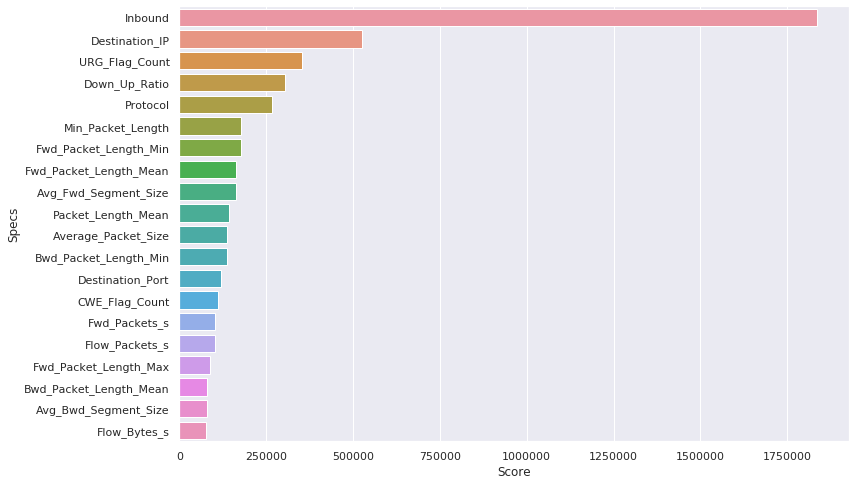

In [20]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data = featureScores.nlargest(20,'Score'), x = "Score", y = "Specs")

### Mutual Information
Mutual information a measure of the mutual dependence of two variables. It measures the amount of information obtained about one variable through observing the other variable. In other words, it determines how much we can know about one variable by understanding another—it’s a little bit like correlation, but mutual information is more general.


In [21]:
#Select top 2 features based on mutual_info_classif
selector = SelectKBest(mutual_info_classif, k = 20).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.head()

,Specs,Score
0,Source_IP,0.588149
1,Source_Port,0.291987
2,Destination_IP,0.550932
3,Destination_Port,0.401746
4,Protocol,0.246200


In [23]:
print(featureScores.nlargest(20,'Score'))

                          Specs     Score
0                     Source_IP  0.588149
2                Destination_IP  0.550932
56          Average_Packet_Size  0.433777
82                      Inbound  0.432733
44           Packet_Length_Mean  0.423334
57         Avg_Fwd_Segment_Size  0.421603
12       Fwd_Packet_Length_Mean  0.421418
43            Max_Packet_Length  0.408175
42            Min_Packet_Length  0.408157
11        Fwd_Packet_Length_Min  0.408033
3              Destination_Port  0.401746
8   Total_Length_of_Fwd_Packets  0.400784
67            Subflow_Fwd_Bytes  0.400438
18                 Flow_Bytes_s  0.395502
10        Fwd_Packet_Length_Max  0.394280
19               Flow_Packets_s  0.379224
40                Fwd_Packets_s  0.376752
22                 Flow_IAT_Max  0.343587
20                Flow_IAT_Mean  0.342950
5                 Flow_Duration  0.332475


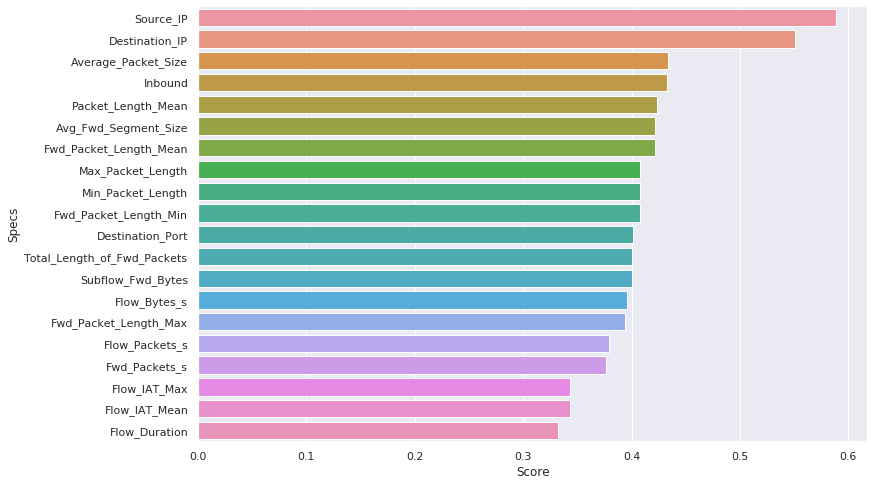

In [24]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data = featureScores.nlargest(20,'Score'), x = "Score", y = "Specs")

To choose a value of $k$ we must compare the performance of the model with classification report of serveral techniques. Now we focus on the different selection techniques

## Feature Correlation Method

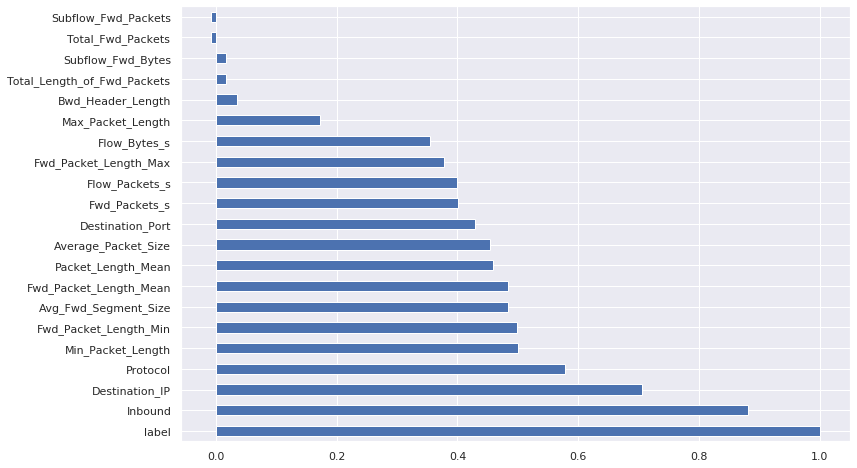

In [25]:
# determine 20 most correlated features
plt.figure(figsize=(12,8))
data_corr_label = data.corr()['label'].sort_values(ascending=False).head(21)
top_corr_features = data_corr_label.index
# plot top 20 most correlated features to our target (HEALTH)
data_corr_label.plot(kind='barh')
plt.show()

In [26]:
print(data_corr_label)

label                          1.000000
Inbound                        0.880243
Destination_IP                 0.704992
Protocol                       0.577539
Min_Packet_Length              0.500483
Fwd_Packet_Length_Min          0.499223
Avg_Fwd_Segment_Size           0.483903
Fwd_Packet_Length_Mean         0.483903
Packet_Length_Mean             0.458794
Average_Packet_Size            0.453441
Destination_Port               0.428167
Fwd_Packets_s                  0.401620
Flow_Packets_s                 0.399525
Fwd_Packet_Length_Max          0.378141
Flow_Bytes_s                   0.354547
Max_Packet_Length              0.172833
Bwd_Header_Length              0.035037
Total_Length_of_Fwd_Packets    0.016198
Subflow_Fwd_Bytes              0.016198
Total_Fwd_Packets             -0.007608
Subflow_Fwd_Packets           -0.007608
Name: label, dtype: float64


# Embedded Method

**Definition**
Embedded methods complete the feature selection process within the construction of the machine learning algorithm itself. In other words, they perform feature selection during the model training, which is why we call them embedded methods.

A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification/regression at the same time.

**Advantages**
The embedded method solves both issues we encountered with the filter and wrapper methods by combining their advantages. Here’s how:
- They take into consideration the interaction of features like wrapper methods do.
- They are faster like filter methods.
- They are more accurate than filter methods.
- They find the feature subset for the algorithm being trained.
- They are much less prone to overfitting.

### Tree-based feature importance

Tree-based algorithms and models (i.e. random forest) are well-established algorithms that not only offer good predictive performance but can also provide us with what we call feature importance as a way to select features.

**Feature importance**

Feature importance tells us which variables are more important in making accurate predictions on the target variable/class. In other words, it identifies which features are the most used by the machine learning algorithm in order to predict the target.

#### Extra Tree Classifier 

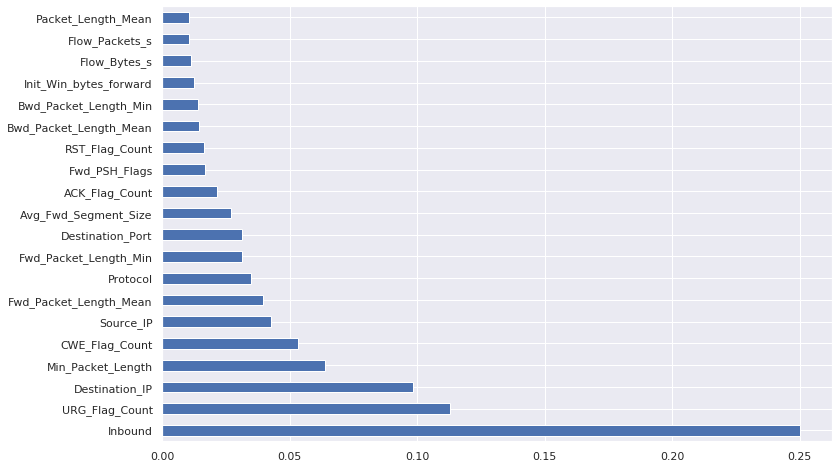

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### RandomForest Classifier

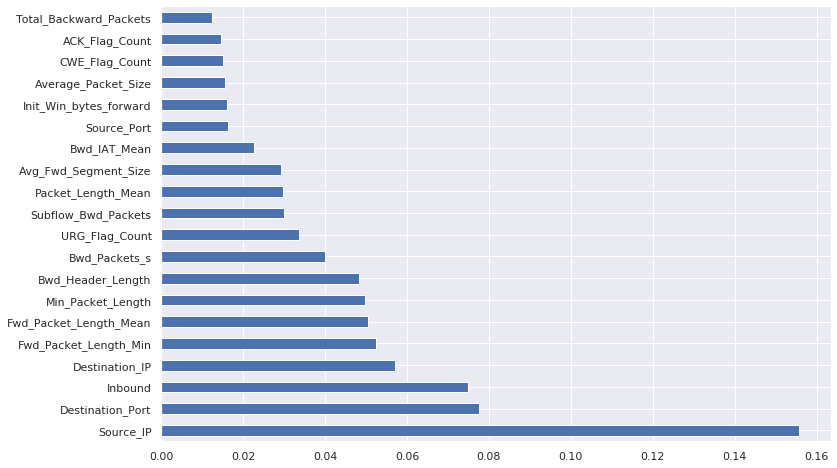

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Feature Selection via SelectFromModel

In [29]:
from sklearn.linear_model import Lasso, LogisticRegression

In [30]:
sfm_selector = SelectFromModel(estimator = RandomForestClassifier())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
       'Total_Backward_Packets', 'Total_Length_of_Bwd_Packets',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Bwd_IAT_Total',
       'Bwd_IAT_Mean', 'Bwd_Header_Length', 'Bwd_Packets_s',
       'Min_Packet_Length', 'ACK_Flag_Count', 'URG_Flag_Count',
       'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Init_Win_bytes_forward',
       'Inbound'],
      dtype='object')

In [31]:
sfm_selector = SelectFromModel(estimator = LogisticRegression(C=1, penalty='l2'))
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['Flow_Duration', 'Flow_Packets_s', 'Flow_IAT_Mean', 'Flow_IAT_Std',
       'Flow_IAT_Max', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Fwd_Header_Length.1',
       'min_seg_size_forward', 'Active_Mean', 'Active_Max', 'Active_Min',
       'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min'],
      dtype='object')

# Wrapper Methods

**Definition**

Wrapper methods work by evaluating a subset of features using a machine learning algorithm that employs a search strategy to look through the space of possible feature subsets, evaluating each subset based on the quality of the performance of a given algorithm.

These methods are called greedy algorithms because they aim to find the best possible combination of features that result in the best performant model— which will be computationally expensive, and often impractical in the case of exhaustive search.

Practically any combination of a search strategy and a machine learning algorithm can be used as a wrapper.

**Advantages**

Given the issues we encountered using filter methods, wrapper methods present two main advantages that deal with those issues:

- They detect the interaction between variables
- They find the optimal feature subset for the desired machine learning algorithm

The wrapper methods usually result in better predictive accuracy than filter methods.

## Recursive Feature Elimination

In [32]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

In [33]:
print(X.loc[:,rfe_selector.support_].columns.to_numpy())

['Source_IP' 'Source_Port' 'Destination_IP' 'Destination_Port'
 'Total_Fwd_Packets' 'Fwd_Packet_Length_Min' 'Fwd_Packet_Length_Mean'
 'Fwd_Packets_s' 'Bwd_Packets_s' 'Min_Packet_Length' 'Max_Packet_Length'
 'Packet_Length_Std' 'ACK_Flag_Count' 'URG_Flag_Count' 'CWE_Flag_Count'
 'Average_Packet_Size' 'Avg_Fwd_Segment_Size' 'Init_Win_bytes_forward'
 'Init_Win_bytes_backward' 'Inbound']


## Sequential Feature Selection (SFS)

Source: https://heartbeat.comet.ml/hands-on-with-feature-selection-techniques-an-introduction-1d8dc6d86c16 

# Hybrid methods

## Filter + Embedded

In [34]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [35]:
#Select top 2 features based on f_classif
selector = SelectKBest(f_classif, k = 25).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
preselect_feature = featureScores.nlargest(25,'Score')['Specs'].to_list()

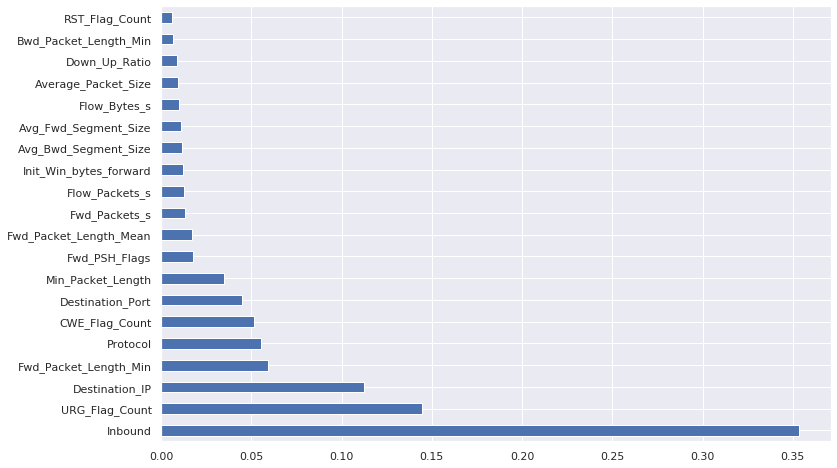

In [36]:
plt.figure(figsize=(12,8))
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X[preselect_feature],y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X[preselect_feature].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [37]:
print(feat_importances.nlargest(20).index.to_list())

['Inbound', 'URG_Flag_Count', 'Destination_IP', 'Fwd_Packet_Length_Min', 'Protocol', 'CWE_Flag_Count', 'Destination_Port', 'Min_Packet_Length', 'Fwd_PSH_Flags', 'Fwd_Packet_Length_Mean', 'Fwd_Packets_s', 'Flow_Packets_s', 'Init_Win_bytes_forward', 'Avg_Bwd_Segment_Size', 'Avg_Fwd_Segment_Size', 'Flow_Bytes_s', 'Average_Packet_Size', 'Down_Up_Ratio', 'Bwd_Packet_Length_Min', 'RST_Flag_Count']


In [38]:
#Select top 2 features based on mutual_info
selector = SelectKBest(f_classif, k = 25).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
preselect_feature = featureScores.nlargest(25,'Score')['Specs'].to_list()

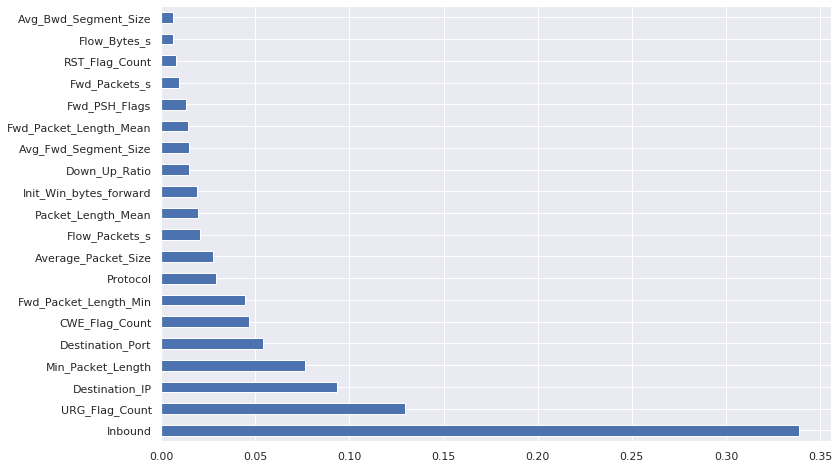

In [39]:
plt.figure(figsize=(12,8))
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X[preselect_feature],y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X[preselect_feature].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [40]:
print(feat_importances.nlargest(20).index.to_list())

['Inbound', 'URG_Flag_Count', 'Destination_IP', 'Min_Packet_Length', 'Destination_Port', 'CWE_Flag_Count', 'Fwd_Packet_Length_Min', 'Protocol', 'Average_Packet_Size', 'Flow_Packets_s', 'Packet_Length_Mean', 'Init_Win_bytes_forward', 'Down_Up_Ratio', 'Avg_Fwd_Segment_Size', 'Fwd_Packet_Length_Mean', 'Fwd_PSH_Flags', 'Fwd_Packets_s', 'RST_Flag_Count', 'Flow_Bytes_s', 'Avg_Bwd_Segment_Size']


## Filter + Wrapper 

In [41]:
#Select top 2 features based on f_classif
selector = SelectKBest(f_classif, k = 25).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
preselect_feature = featureScores.nlargest(25,'Score')['Specs'].to_list()

In [42]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X[preselect_feature],y)
print(X[preselect_feature].loc[:,rfe_selector.support_].columns.to_list())

['Inbound', 'Destination_IP', 'URG_Flag_Count', 'Down_Up_Ratio', 'Protocol', 'Min_Packet_Length', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Avg_Fwd_Segment_Size', 'Packet_Length_Mean', 'Average_Packet_Size', 'Destination_Port', 'CWE_Flag_Count', 'Fwd_Packets_s', 'Flow_Packets_s', 'Fwd_Packet_Length_Max', 'Bwd_Packet_Length_Mean', 'Flow_Bytes_s', 'Init_Win_bytes_forward', 'Packet_Length_Std']


In [43]:
#Select top 2 features based on mutual_info
selector = SelectKBest(f_classif, k = 25).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
preselect_feature = featureScores.nlargest(25,'Score')['Specs'].to_list()

In [44]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X[preselect_feature],y)
print(X[preselect_feature].loc[:,rfe_selector.support_].columns.to_list())

['Inbound', 'Destination_IP', 'URG_Flag_Count', 'Down_Up_Ratio', 'Protocol', 'Min_Packet_Length', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Avg_Fwd_Segment_Size', 'Packet_Length_Mean', 'Average_Packet_Size', 'Destination_Port', 'CWE_Flag_Count', 'Fwd_Packets_s', 'Flow_Packets_s', 'Fwd_Packet_Length_Max', 'Bwd_Packet_Length_Mean', 'Avg_Bwd_Segment_Size', 'Init_Win_bytes_forward', 'Packet_Length_Std']


## Embedded + Wrapper

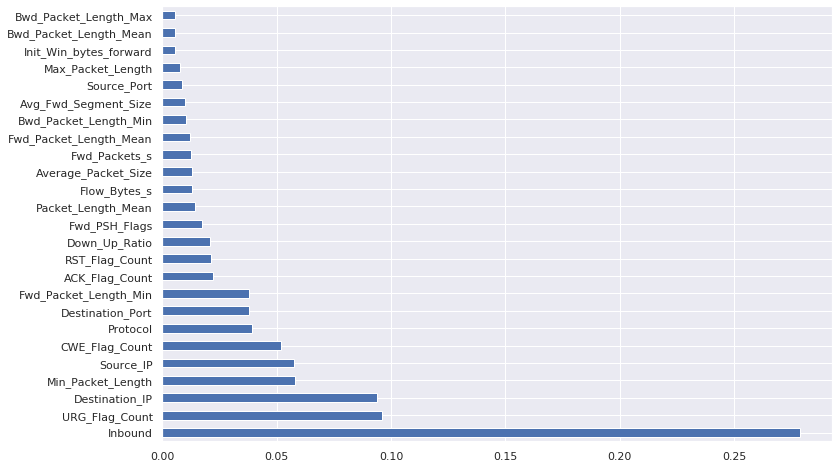

In [45]:
plt.figure(figsize=(12,8))
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [46]:
feature_preselect = feat_importances.nlargest(25).index.to_list()

In [47]:
from sklearn.tree import DecisionTreeClassifier
rfe_selector = RFE(estimator=DecisionTreeClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X[feature_preselect],y)
print(X[feature_preselect].loc[:,rfe_selector.support_].columns.to_list())

['Destination_IP', 'Min_Packet_Length', 'Source_IP', 'CWE_Flag_Count', 'Protocol', 'Destination_Port', 'Fwd_Packet_Length_Min', 'ACK_Flag_Count', 'RST_Flag_Count', 'Down_Up_Ratio', 'Flow_Bytes_s', 'Average_Packet_Size', 'Fwd_Packets_s', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Min', 'Source_Port', 'Max_Packet_Length', 'Init_Win_bytes_forward', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Max']


# SHAP

In [48]:
import shap
import xgboost as xgb
import lightgbm

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)   

In [50]:
xgb_model = xgb.train({'objective':'binary:logitraw'}, xgb.DMatrix(X_train, label=y_train))
#xgb_model = xgb.train({'objective':'binary:logistic'}, xgb.DMatrix(X_train, label=y_train))

[11:54:27] WARNING: ../src/learner.cc:1205: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb_model)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap_values_XGB_train = explainerXGB.shap_values(X_train)

In [52]:
# XGBoost
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train.columns.values)

In [53]:
# j will be the record we explain
j = 0
# initialize js for SHAP
shap.initjs()

In [54]:
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], X_test.iloc[[j]])

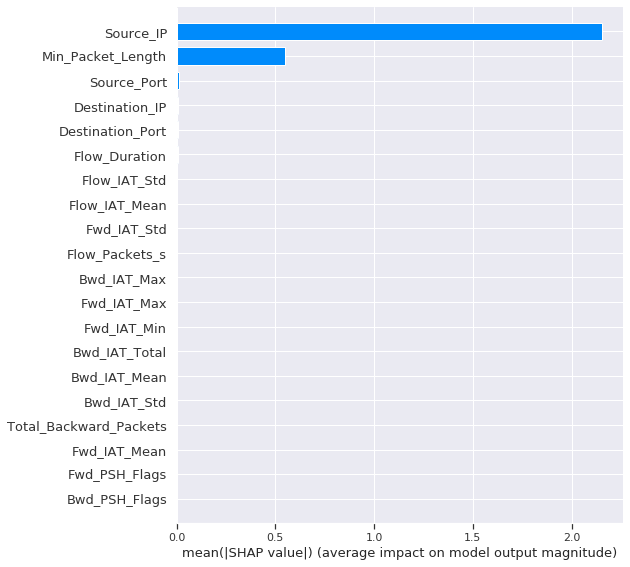

In [55]:
shap.summary_plot(shap_values_XGB_train, X_train, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values_XGB_train, X_train)